# House Price: Advanced regression technique

1. 데이터 탐색
    -  필요한 데이터 지표 파악
    -  컬럼간의 상관관계 파악
2. 데이터 시각화
    - 그래프를 통해 상관관계 파악
    - 관계성 낮은 데이터 칼럼 제거
3. 데이터 전처리(정제)
   -  데이터 타입에 따른 분류 및 표준화
         - 카테고리 데이터: Value를 숫자로 변경
         - 서수 데이터: 0과 1 사이의 값으로 표준화
         - 연속형 데이터: Normalization
   -  데이터 품질 높이기
      결측치, 이상치 제거, 불필요한 피처 제거
4. 모델링
     - 데이터 타입별로 모델링
     - 최대한 여러가지 DL 모델 써보기
5. 예측
    - 모델링 최적화
6. 결론
    - 최적 모델 선정과 예측률(accuracy) 비교


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from numpy import *
import seaborn as sns
%matplotlib inline
import tensorflow as tf
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

In [2]:
df = pd.read_csv('data/train.csv', sep=',', encoding='UTF-8')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
len(df)

1460

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df.shape

(1460, 81)

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [10]:
df[df.columns[1]].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [11]:
#종속변수 SalePrice의 기초통계량
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Python\Anaconda3-52\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


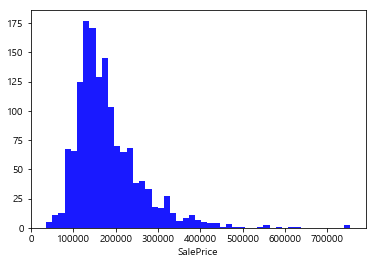

In [12]:
#집값 분포 확인
sns.distplot(df['SalePrice'],kde = False, color = 'b', hist_kws={'alpha':0.9});

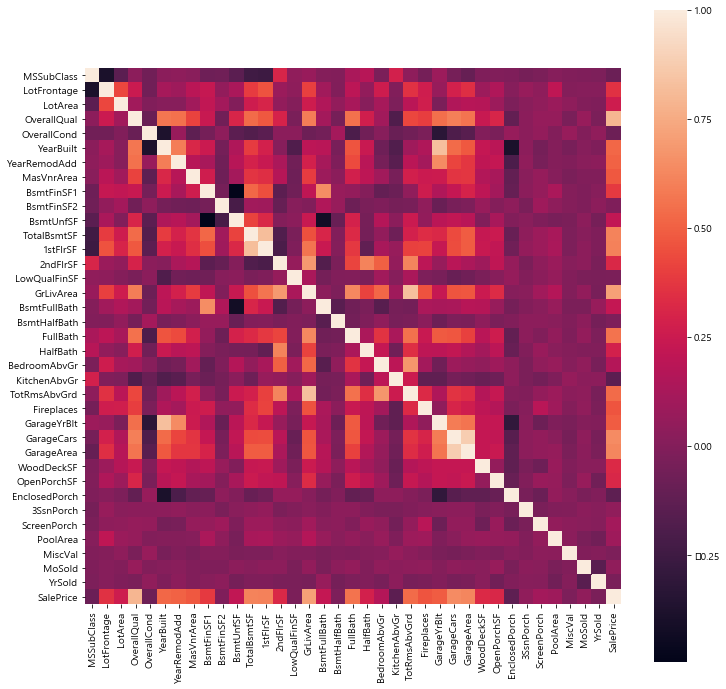

In [13]:
# ID를 제외한 수치형 변수들 간의 상관계수 확인
corr = df.select_dtypes(include = ['float64','int64']).iloc[:,1:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=1,square=True);

In [14]:
corr.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.682150,-0.468952,-0.156853,-0.039187,-0.081188,-0.054560,-0.142078,-0.298294,-0.199612,...,-0.163056,-0.116178,0.010317,-0.140172,-0.128932,-0.120944,-0.003922,-0.034707,-0.033821,-0.268209
LotFrontage,-0.682150,1.000000,0.696861,0.458377,-0.269892,0.266324,0.196254,0.444685,0.404159,-0.001474,...,0.267658,0.331089,-0.125950,0.026320,0.049539,0.280274,-0.149234,-0.052115,-0.136644,0.586682
LotArea,-0.468952,0.696861,1.000000,0.204538,-0.112452,0.070685,0.000192,0.248273,0.410450,0.160966,...,0.306394,0.154487,-0.083411,-0.032972,0.065824,0.162956,-0.063306,-0.070780,-0.117656,0.369766
OverallQual,-0.156853,0.458377,0.204538,1.000000,-0.493494,0.840035,0.833815,0.765094,0.380313,-0.295294,...,0.509867,0.608282,-0.493760,-0.045841,-0.023241,-0.008481,-0.275071,0.006037,-0.209533,0.961367
OverallCond,-0.039187,-0.269892,-0.112452,-0.493494,1.000000,-0.648686,-0.344108,-0.476677,-0.233079,0.150669,...,-0.245491,-0.298651,0.330849,0.019959,0.101778,-0.024291,0.177180,-0.022561,0.110065,-0.474182
YearBuilt,-0.081188,0.266324,0.070685,0.840035,-0.648686,1.000000,0.881460,0.649466,0.424626,-0.234811,...,0.506857,0.474354,-0.699778,0.010693,-0.132373,-0.075683,-0.229215,-0.018789,-0.111301,0.784025
YearRemodAdd,-0.054560,0.196254,0.000192,0.833815,-0.344108,0.881460,1.000000,0.531707,0.282874,-0.294470,...,0.464809,0.496147,-0.589472,0.002604,-0.164257,-0.113137,-0.218927,-0.027404,-0.089295,0.757755
MasVnrArea,-0.142078,0.444685,0.248273,0.765094,-0.476677,0.649466,0.531707,1.000000,0.454394,-0.267864,...,0.433670,0.415956,-0.426124,-0.045513,0.026631,-0.022177,-0.244522,-0.062631,-0.162052,0.801564
BsmtFinSF1,-0.298294,0.404159,0.410450,0.380313,-0.233079,0.424626,0.282874,0.454394,1.000000,0.051033,...,0.435215,0.206748,-0.320510,-0.000563,0.063666,0.188581,-0.131083,-0.099897,-0.030009,0.509466
BsmtFinSF2,-0.199612,-0.001474,0.160966,-0.295294,0.150669,-0.234811,-0.294470,-0.267864,0.051033,1.000000,...,-0.004225,-0.176580,0.119855,-0.088680,0.143261,0.059524,0.003501,-0.083686,0.066816,-0.224561


In [15]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [17]:
cols_numerical = []
for col in df:
    if df[col].dtype == ('int64'or'float64'):
        cols_numerical.append(col)
        
cols_numerical = cols_numerical[1:-1]
cols_ordinal = ['Street','LotShape','Utilities','LandSlope','OverallQual',
                'OverallCond','KitchenQual', 'FireplaceQu',
                'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
               'Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond',
                'PoolQC', 'Fence']
cols_categorical = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                    'Foundation', 'Heating','CentralAir',
                    'Electrical','GarageQual','MiscFeature', 'SaleType', 'SaleCondition','GarageType']

In [18]:
cols_numerical

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [19]:
dtype(df['SalePrice'])

dtype('int64')

In [20]:
# numerical의 NA값은 모두 0으로 대치
df[cols_numerical] = df[cols_numerical].fillna(0)
# categorical은 결측치를 하나의 unique값으로 보고 0에 대응시킴
df[cols_categorical] = df[cols_categorical].fillna(0)
# ordinal은 data description에 따라 NA = 0인 경우 0 처리
df[cols_ordinal[:12]] = df[cols_ordinal[:12]].fillna(0)
# 설명이 없을 경우 0.5로 처리
df[cols_ordinal[12:]] = df[cols_ordinal[12:]].fillna(0.5)

In [21]:
df[cols_numerical].info()
df[cols_categorical].info()
df[cols_ordinal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodD

In [22]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
                ... 
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageYrBlt       81
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF  

In [23]:
# 카테고리형
for col in df[cols_categorical]:
    val = 1
    temp_dict = {}
    for unique in df[col].unique():
        if unique != 0:
            temp_dict[unique] = val
            df[col][df[col] == unique] = val
            val += 1
    print(temp_dict)
# df2.loc[:,['Foundation','Heating', 'CentralAir', 'Electrical']]

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{'RL': 1, 'RM': 2, 'C (all)': 3, 'FV': 4, 'RH': 5}
{'Lvl': 1, 'Bnk': 2, 'Low': 3, 'HLS': 4}
{'Inside': 1, 'FR2': 2, 'Corner': 3, 'CulDSac': 4, 'FR3': 5}
{'CollgCr': 1, 'Veenker': 2, 'Crawfor': 3, 'NoRidge': 4, 'Mitchel': 5, 'Somerst': 6, 'NWAmes': 7, 'OldTown': 8, 'BrkSide': 9, 'Sawyer': 10, 'NridgHt': 11, 'NAmes': 12, 'SawyerW': 13, 'IDOTRR': 14, 'MeadowV': 15, 'Edwards': 16, 'Timber': 17, 'Gilbert': 18, 'StoneBr': 19, 'ClearCr': 20, 'NPkVill': 21, 'Blmngtn': 22, 'BrDale': 23, 'SWISU': 24, 'Blueste': 25}
{'Norm': 1, 'Feedr': 2, 'PosN': 3, 'Artery': 4, 'RRAe': 5, 'RRNn': 6, 'RRAn': 7, 'PosA': 8, 'RRNe': 9}
{'Norm': 1, 'Artery': 2, 'RRNn': 3, 'Feedr': 4, 'PosN': 5, 'PosA': 6, 'RRAn': 7, 'RRAe': 8}
{'1Fam': 1, '2fmCon': 2, 'Duplex': 3, 'TwnhsE': 4, 'Twnhs': 5}
{'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8}
{'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6}
{'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 

In [24]:
df_temp = df[['Street','LotShape','Utilities','LandSlope','OverallQual',
                'OverallCond','KitchenQual', 'FireplaceQu',
                'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
               'Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond',
                'PoolQC', 'Fence']]

In [25]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [26]:
df['Street'][df['Street']=='Pave'] = (2 - 1/2) /2
df['Street'][df['Street']=='Grvl'] = (1 - 1/2) /2

df['Street'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([0.75, 0.25], dtype=object)

In [27]:
df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [28]:
df['LotShape'][df['LotShape']=='Reg'] = (4 - 1/2) /4
df['LotShape'][df['LotShape']=='IR1'] = (3 - 1/2) /4
df['LotShape'][df['LotShape']=='IR2'] = (2 - 1/2) /4
df['LotShape'][df['LotShape']=='IR3'] = (1 - 1/2) /4

df['LotShape'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.875, 0.625, 0.375, 0.125], dtype=object)

In [29]:
df['OverallQual'].unique()
#,'OverallQual','OverallCond','KitchenQual', 'FireplaceQu',
#     'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
#     'Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#     'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond',
#     'PoolQC', 'Fence'

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [30]:
df['Utilities'][df['Utilities']=='AllPub'] = (2 - 1/2) /2
df['Utilities'][df['Utilities']=='NoSeWa'] = (1 - 1/2) /2

df['LandSlope'][df['LandSlope']=='Gtl'] = (3 - 1/2) /3
df['LandSlope'][df['LandSlope']=='Mod'] = (2 - 1/2) /3
df['LandSlope'][df['LandSlope']=='Sev'] = (1 - 1/2) /3

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:5: S

In [31]:
df['Utilities'].unique()

array([0.75, 0.25], dtype=object)

In [32]:
df['LandSlope'].unique()

array([0.8333333333333334, 0.5, 0.16666666666666666], dtype=object)

In [33]:
df['OverallQual'][df['OverallQual']==10] = (10 - 1/2) /10
df['OverallQual'][df['OverallQual']==9] = (9 - 1/2) /10
df['OverallQual'][df['OverallQual']==8] = (8 - 1/2) /10
df['OverallQual'][df['OverallQual']==7] = (7 - 1/2) /10
df['OverallQual'][df['OverallQual']==6] = (6 - 1/2) /10
df['OverallQual'][df['OverallQual']==5] = (5 - 1/2) /10
df['OverallQual'][df['OverallQual']==4] = (4 - 1/2) /10
df['OverallQual'][df['OverallQual']==3] = (3 - 1/2) /10
df['OverallQual'][df['OverallQual']==2] = (2 - 1/2) /10
df['OverallQual'][df['OverallQual']==1] = (1 - 1/2) /10

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
df['OverallQual'].unique()

array([0.65, 0.55, 0.75, 0.45, 0.85, 0.35, 0.95, 0.25, 0.05, 0.15])

In [35]:
df['OverallCond'][df['OverallCond']==10] = (10 - 1/2) /10
df['OverallCond'][df['OverallCond']==9] = (9 - 1/2) /10
df['OverallCond'][df['OverallCond']==8] = (8 - 1/2) /10
df['OverallCond'][df['OverallCond']==7] = (7 - 1/2) /10
df['OverallCond'][df['OverallCond']==6] = (6 - 1/2) /10
df['OverallCond'][df['OverallCond']==5] = (5 - 1/2) /10
df['OverallCond'][df['OverallCond']==4] = (4 - 1/2) /10
df['OverallCond'][df['OverallCond']==3] = (3 - 1/2) /10
df['OverallCond'][df['OverallCond']==2] = (2 - 1/2) /10
df['OverallCond'][df['OverallCond']==1] = (1 - 1/2) /10

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
# 서수형
df_temp = df[['KitchenQual', 'FireplaceQu',
                'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
               'Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond',
                'PoolQC', 'Fence']]
for col in df_temp:    
    df[col][df[col] == 'Ex'] = (5 - 1/2) / 5
    df[col][df[col] == 'Gd'] = (4 - 1/2) / 5
    df[col][df[col] == 'TA'] = (3 - 1/2) / 5
    df[col][df[col] == 'Fa'] = (2 - 1/2) / 5
    df[col][df[col] == 'Po'] = (1 - 1/2) / 5
    print(df[col].unique())

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:11: Settin

[0.7 0.5 0.9 0.3]
[0 0.5 0.7 0.3 0.9 0.1]
[0.9 0.7 0.5 0.3 0.1]
['Y' 'N' 'P']
[0.7 0.5 0.9 0.3]
[0.5 0.7 0.3 0.1 0.9]
[0.5 'Grvl' 'Pave']
[0.7 0.5 0.9 0.3]
[0.5 0.7 0.3 0.1]
['No' 0.7 'Mn' 'Av' 0.5]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 0.5 'LwQ']
['Unf' 'BLQ' 0.5 'ALQ' 'Rec' 'LwQ' 'GLQ']
['RFn' 'Unf' 'Fin' 0.5]
[1 2 3 0 4 5]
[0.5 0.3 0.7 0.1 0.9]
[0.5 0.9 0.3 0.7]
[0.5 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [37]:
df['PavedDrive'][df['PavedDrive']=='Y'] = (3 - 1/2) /3
df['PavedDrive'][df['PavedDrive']=='P'] = (2 - 1/2) /3
df['PavedDrive'][df['PavedDrive']=='N'] = (1 - 1/2) /3
df['PavedDrive'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.8333333333333334, 0.16666666666666666, 0.5], dtype=object)

In [38]:
df['Alley'].unique()

array([0.5, 'Grvl', 'Pave'], dtype=object)

In [40]:
df['Alley'][df['Alley']=='Pave'] = (3 - 1/2) /3
df['Alley'][df['Alley']=='Grvl'] = (2 - 1/2) /3
df['Alley'][df['Alley']== '0'] = (1 - 1/2) /3
df['Alley'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.5, 0.8333333333333334], dtype=object)

In [41]:
df['BsmtExposure'][df['BsmtExposure']=='No'] = (5 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']== 0.7] = (4 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']=='Mn'] = (3 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']=='Av'] = (2 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']== 0] = (1 - 1/2) /5
df['BsmtExposure'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.9, 0.7, 0.5, 0.3], dtype=object)

In [42]:
df['BsmtFinType1'][df['BsmtFinType1']=='GLQ'] = (7 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 'ALQ'] = (6 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']=='Unf'] = (5 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']=='Rec'] = (4 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 'BLQ'] = (3 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 'LwQ'] = (2 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 0] = (1 - 1/2) /7

df['BsmtFinType1'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.9285714285714286, 0.7857142857142857, 0.6428571428571429, 0.5,
       0.35714285714285715, 0.21428571428571427], dtype=object)

In [43]:
df['BsmtFinType2'][df['BsmtFinType2']=='GLQ'] = (7 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 'ALQ'] = (6 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']=='BLQ'] = (5 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']=='Rec'] = (4 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 'LwQ'] = (3 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 'Unf'] = (2 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 0] = (1 - 1/2) /7

df['BsmtFinType2'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.21428571428571427, 0.6428571428571429, 0.5, 0.7857142857142857,
       0.35714285714285715, 0.9285714285714286], dtype=object)

In [44]:
df['GarageFinish'][df['GarageFinish']=='Fin'] = (4 - 1/2) /4
df['GarageFinish'][df['GarageFinish']=='RFn'] = (3 - 1/2) /4
df['GarageFinish'][df['GarageFinish']=='Unf'] = (2 - 1/2) /4
df['GarageFinish'][df['GarageFinish']==0] = (1 - 1/2) /4

df['GarageFinish'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.625, 0.375, 0.875, 0.5], dtype=object)

In [45]:
df['GarageQual'].unique()

array([1, 2, 3, 0, 4, 5], dtype=object)

In [46]:
df['GarageQual'] = (df['GarageQual']-1/2)/5

In [47]:
df['GarageQual'][df['GarageQual']== -0.1] = 0
df['GarageQual'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([0.1, 0.3, 0.5, 0, 0.7, 0.9], dtype=object)

In [48]:
df['Fence'][df['Fence'] == 'GdPrv'] = (5 - 1/2) / 5
df['Fence'][df['Fence'] == 'MnPrv'] = (4 - 1/2) / 5
df['Fence'][df['Fence'] == 'GdWo'] = (3 - 1/2) / 5
df['Fence'][df['Fence'] == 'MnWw'] = (2 - 1/2) / 5
df['Fence'][df['Fence'] == 0] = (1 - 1/2) / 5
df['Fence'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.5, 0.7, 0.9, 0.3], dtype=object)

## 표준화
정확히는 Standardization: (요소값 - 평균)/표준편차 <p>
Normalization: (요소값 - 최소값)/(최대값 - 최소값)


In [49]:
cols_numerical

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [50]:
# 수치형 데이터
for col in cols_numerical:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
    
df[cols_numerical].head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073350,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.575228,-0.288554,-0.944267,-0.459145,...,0.350880,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730
1,-0.872264,-0.091855,-0.071812,2.178881,0.156680,-0.429430,1.171591,-0.288554,-0.641008,0.466305,...,-0.060710,1.625638,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228
2,0.073350,0.073455,0.651256,-0.517023,0.984415,0.829930,0.092875,-0.288554,-0.301540,-0.313261,...,0.631510,-0.751918,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730
3,0.309753,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.499103,-0.288554,-0.061648,-0.687089,...,0.790533,-0.751918,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186
4,0.073350,0.375020,1.374324,-0.517023,0.951306,0.733056,0.463410,-0.288554,-0.174805,0.199611,...,1.697903,0.779930,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730
5,-0.163054,0.360493,-0.794879,-0.517023,0.719540,0.490872,0.632233,-0.288554,-1.138896,-0.595911,...,0.032833,-0.432783,-0.251453,-0.359202,10.798746,-0.270116,-0.068668,1.323283,1.360426,0.891688
6,-0.872264,-0.043364,1.374324,-0.517023,1.083743,0.975241,2.028862,-0.288554,-0.566325,1.432785,...,0.762470,1.282568,0.156057,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.620678,-0.614228
7,0.073350,-0.013508,0.651256,0.381612,0.057352,-0.574741,0.910682,-0.090190,-0.794901,0.112993,...,0.051542,1.123000,2.374723,3.371217,-0.116299,-0.270116,-0.068668,0.617812,1.730299,0.891688
8,-0.163054,-0.440508,0.651256,-0.517023,-1.333243,-1.688790,-0.972685,-0.288554,0.870759,-0.240320,...,-0.023293,-0.033864,-0.704242,2.994902,-0.116299,-0.270116,-0.068668,-0.087658,-0.858816,0.138730
9,3.146594,-0.310264,-0.794879,0.381612,-1.068368,-1.688790,0.893142,-0.288554,-0.966898,-0.151422,...,-1.253387,-0.751918,-0.643870,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.968437,0.138730


In [51]:
df1 = pd.read_csv('./data/train.csv')
df3 = df1['SalePrice']
df3

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [52]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.073350,1,65.0,-0.207071,0.75,0.5,0.875,1,0.75,...,-0.068668,0.5,0.5,0,-0.087658,-1.598563,0.138730,1,1,208500
1,2,-0.872264,1,80.0,-0.091855,0.75,0.5,0.875,1,0.75,...,-0.068668,0.5,0.5,0,-0.087658,-0.488943,-0.614228,1,1,181500
2,3,0.073350,1,68.0,0.073455,0.75,0.5,0.625,1,0.75,...,-0.068668,0.5,0.5,0,-0.087658,0.990552,0.138730,1,1,223500
3,4,0.309753,1,60.0,-0.096864,0.75,0.5,0.625,1,0.75,...,-0.068668,0.5,0.5,0,-0.087658,-1.598563,-1.367186,1,2,140000
4,5,0.073350,1,84.0,0.375020,0.75,0.5,0.625,1,0.75,...,-0.068668,0.5,0.5,0,-0.087658,2.100173,0.138730,1,1,250000
5,6,-0.163054,1,85.0,0.360493,0.75,0.5,0.625,1,0.75,...,-0.068668,0.5,0.7,1,1.323283,1.360426,0.891688,1,1,143000
6,7,-0.872264,1,75.0,-0.043364,0.75,0.5,0.875,1,0.75,...,-0.068668,0.5,0.5,0,-0.087658,0.620678,-0.614228,1,1,307000
7,8,0.073350,1,NaN,-0.013508,0.75,0.5,0.625,1,0.75,...,-0.068668,0.5,0.5,1,0.617812,1.730299,0.891688,1,1,200000
8,9,-0.163054,2,51.0,-0.440508,0.75,0.5,0.875,1,0.75,...,-0.068668,0.5,0.5,0,-0.087658,-0.858816,0.138730,1,2,129900
9,10,3.146594,1,50.0,-0.310264,0.75,0.5,0.875,1,0.75,...,-0.068668,0.5,0.5,0,-0.087658,-1.968437,0.138730,1,1,118000


In [53]:
df.to_csv('./data/HousePrice_preprocessing_full.csv', sep=',', encoding='UTF-8')